# In-Class Demo for SIR model & Euler with Population Dynamics

Dan Larremore, 9/30/2025

We're going to implement the following simple recursion, which is known as Forward Euler

$$t_{n+1} = t_n + \Delta t$$
$$y_{n+1} = y_n + f(y_n,t_n)\cdot\Delta t$$

## Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Define the Forward Euler solver as a function

In [4]:
def SIR(S0,I0,R0,pC, gamma, t_max, stepsize):
    T = np.arange(0,t_max+stepsize,stepsize)
    G = len(S0)
    S = np.zeros([len(T), G])
    I = np.zeros([len(T), G])
    R = np.zeros([len(T), G])
    N = S0+I0+R0
    
    for idx,t in enumerate(T):
        if idx==0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
            N = S[0,:] + I[0,:] + R[0,:]
        else:
            Q = np.diag(S[idx-1,:]) @ pC @ I[idx-1,:] / N
            dS_dt = -Q
            dI_dt = Q - gamma *I[idx-1,:]
            dR_dt = gamma * I[idx-1,:]
            
            S[idx] = S[idx-1,:] + dS_dt * stepsize
            I[idx] = I[idx-1,:] + dI_dt * stepsize
            R[idx] = R[idx-1,:] + dR_dt * stepsize
    
    return S, I, R, T

## Simulate and plot

(0.0, 26.25)

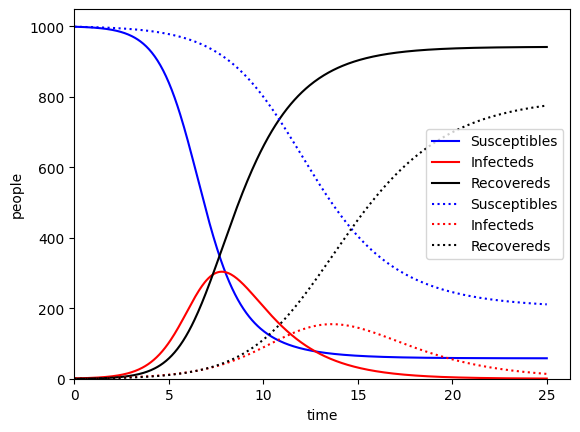

In [5]:
# SIR(S0,I0,R0,pC, gamma, t_max, stepsize):
pC = [[1.5, 0],
      [0,1.0]]
S,I,R,T = SIR([999, 999],[1,1],[0,0],
             pC,0.5,25,0.05)
fig, ax = plt.subplots()
ls = ['-',':']
for group in [0,1]:
    ax.plot(T,S[:, group], color='b', ls=ls[group], label='Susceptibles')
    ax.plot(T,I[:, group], color='r', ls=ls[group], label='Infecteds')
    ax.plot(T,R[:, group], color='k', ls=ls[group], label='Recovereds')
ax.set_xlabel('time')
ax.set_ylabel('people')
ax.legend()
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

(0.0, 52.5)

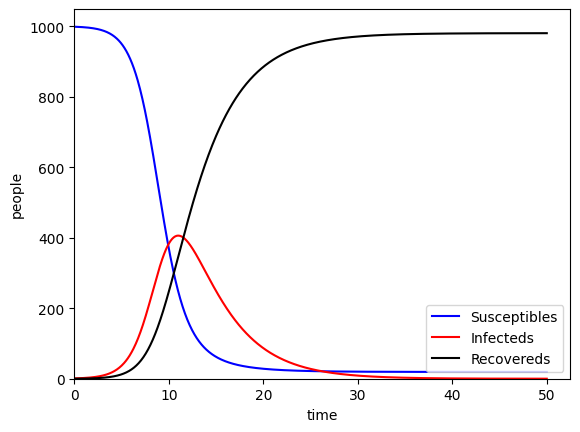

In [4]:
# SIR(S0,I0,R0, beta, gamma, t_max, stepsize):
S,I,R,T = SIR(999,1,0,
             1,0.25,50,0.05)
fig, ax = plt.subplots()
ax.plot(T,S, color='b', label='Susceptibles')
ax.plot(T,I, color='r', label='Infecteds')
ax.plot(T,R, color='k', label='Recovereds')
ax.set_xlabel('time')
ax.set_ylabel('people')
ax.legend()
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)